# Домашнее задание №6

## Реализация 1D CNN

### Загрузка библиотек и датасета 

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import regularizers
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [59]:
file = 'Intr_Det_Dense_Lab4.csv'
df1 = pd.read_csv(file)
df1

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,1,0,udp,other,SF,146,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,2,0,tcp,private,S0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack,19
3,3,0,tcp,http,SF,232,8153,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,4,0,tcp,http,SF,199,420,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,125968,0,tcp,private,S0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,attack,20
125969,125969,8,udp,private,SF,105,145,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,125970,0,tcp,smtp,SF,2231,384,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,125971,0,tcp,klogin,S0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack,20


### Обработка данных

In [60]:
df1.loc[df1['outcome'] == "normal", "outcome"] = 'normal'
df1.loc[df1['outcome'] != 'normal', "outcome"] = 'attack'

In [61]:
df1['level'].unique(), df1['outcome'].unique()

(array([20, 15, 19, 21, 18, 17, 16, 12, 14, 11,  2, 13, 10,  9,  8,  7,  3,
         5,  1,  6,  0,  4]),
 array(['normal', 'attack'], dtype=object))

In [62]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_data = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_data, columns = cols)
    return std_df

In [63]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)

    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]

    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1

    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [64]:
df1 = df1.dropna()

In [65]:
df2 = preprocess(df1)

### Разделение данных на выборки и осуществление нормализации.

In [66]:
X = df2.drop(columns=['outcome'])
y = df2['outcome'].astype('int') 

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [70]:
print("X_normalized shape:", X_normalized.shape)
print("y shape:", y.shape)

X_normalized shape: (125973, 124)
y shape: (125973,)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

### Архитектура модели 1D CNN

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


In [75]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [77]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9635 - loss: 0.1123 - val_accuracy: 0.9936 - val_loss: 0.0217
Epoch 2/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9904 - loss: 0.0293 - val_accuracy: 0.9949 - val_loss: 0.0140
Epoch 3/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9925 - loss: 0.0237 - val_accuracy: 0.9966 - val_loss: 0.0104
Epoch 4/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9933 - loss: 0.0197 - val_accuracy: 0.9956 - val_loss: 0.0113
Epoch 5/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9941 - loss: 0.0197 - val_accuracy: 0.9967 - val_loss: 0.0099
Epoch 6/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9941 - loss: 0.0182 - val_accuracy: 0.9973 - val_loss: 0.0077
Epoch 7/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9951 - loss: 0.0145 - val_accuracy: 0.9970 - val_loss: 0.0075
Epoch 8/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9950 -

### Графики обучения

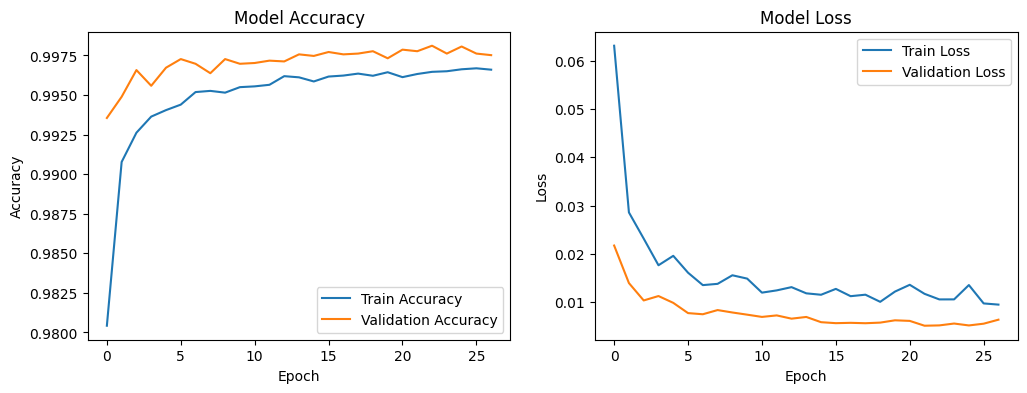

In [78]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


### Предсказания и метрики

In [79]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13422
           1       1.00      1.00      1.00     11773

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195


Confusion Matrix:
[[13367    55]
 [   21 11752]]


## Реализация 2D CNN

In [80]:
num_features = X_normalized.shape[1]
print(f"Всего признаков: {num_features}")


Всего признаков: 124


In [81]:
def find_best_factors(n):
    factors = []
    for i in range(1, int(np.sqrt(n)) + 1):
        if n % i == 0:
            factors.append((i, n//i))
    return factors

In [83]:
import numpy as np
best_factors = find_best_factors(num_features)
print(f"Возможные размеры матриц: {best_factors}")

rows, cols = best_factors[-1]
print(f"Выбран размер матрицы: {rows}x{cols}")

Возможные размеры матриц: [(1, 124), (2, 62), (4, 31)]
Выбран размер матрицы: 4x31


In [84]:
X_2d = X_normalized.reshape(-1, rows, cols, 1)

In [85]:
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [91]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model_2d = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(rows, cols, 1)),
    BatchNormalization(),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu', padding='valid'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


In [92]:
model_2d.compile(optimizer=Adam(learning_rate=0.0001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [93]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_2d = model_2d.fit(
    X_train_2d, y_train_2d,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9196 - loss: 0.2196 - val_accuracy: 0.9908 - val_loss: 0.0328
Epoch 2/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9867 - loss: 0.0423 - val_accuracy: 0.9939 - val_loss: 0.0212
Epoch 3/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9906 - loss: 0.0295 - val_accuracy: 0.9946 - val_loss: 0.0172
Epoch 4/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9926 - loss: 0.0223 - val_accuracy: 0.9952 - val_loss: 0.0173
Epoch 5/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9941 - loss: 0.0182 - val_accuracy: 0.9955 - val_loss: 0.0130
Epoch 6/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9944 - loss: 0.0166 - val_accuracy: 0.9957 - val_loss: 0.0113
Epoch 7/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9950 - loss: 0.0153 - val_accuracy: 0.9960 - val_loss: 0.0113
Epoch 8/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9955 -

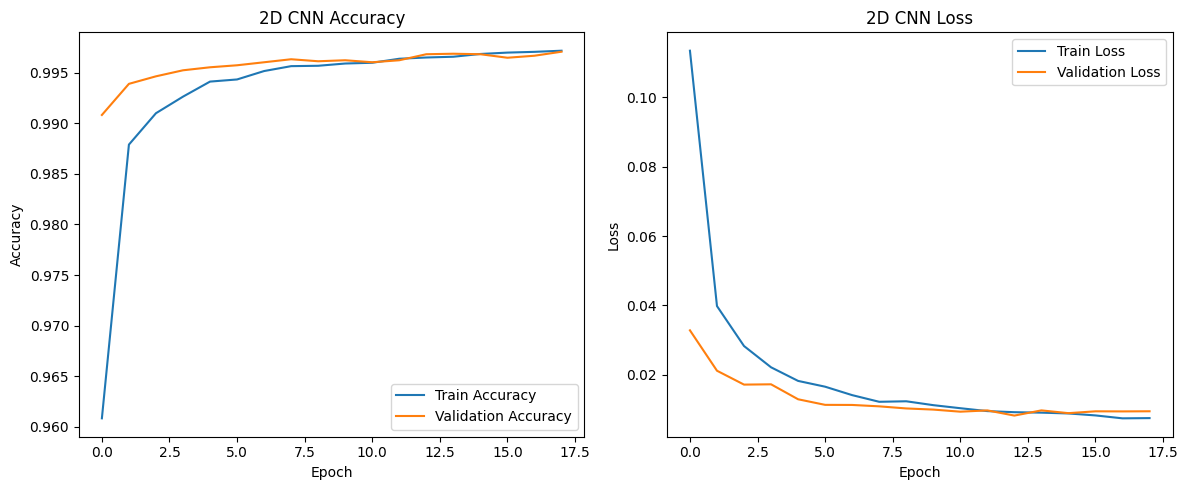

In [94]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_2d.history['accuracy'], label='Train Accuracy')
plt.plot(history_2d.history['val_accuracy'], label='Validation Accuracy')
plt.title('2D CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_2d.history['loss'], label='Train Loss')
plt.plot(history_2d.history['val_loss'], label='Validation Loss')
plt.title('2D CNN Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()


In [95]:
y_pred_2d = (model_2d.predict(X_test_2d) > 0.5).astype("int32")

print("\n2D CNN Classification Report:")
print(classification_report(y_test_2d, y_pred_2d))

print("\n2D CNN Confusion Matrix:")
print(confusion_matrix(y_test_2d, y_pred_2d))

788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

2D CNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13469
           1       1.00      1.00      1.00     11726

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195


2D CNN Confusion Matrix:
[[13429    40]
 [   23 11703]]


In [98]:
print("\nСравнение моделей:")
y_test_np = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else np.array(y_test)
y_test_2d_np = y_test_2d.to_numpy() if hasattr(y_test_2d, 'to_numpy') else np.array(y_test_2d)

print("1D CNN Test Accuracy:", np.mean(y_pred.flatten() == y_test_np))
print("2D CNN Test Accuracy:", np.mean(y_pred_2d.flatten() == y_test_2d_np))


Сравнение моделей:
1D CNN Test Accuracy: 0.9969835284778726
2D CNN Test Accuracy: 0.9974995038698155


## Сравнение с Лаб 4.1

Точность моделей:

    Lab 4.1 (Dense): 96.00%

    1D CNN: 99.70%
    
    2D CNN: 99.75%